# Data Analysis and pre-processing

In [52]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [53]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
my_data = pd.read_csv(path)
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to 1 of 5 medications, Drug A, Drug B, Drug C, Drug X, Drug Y.



In [54]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [55]:
print(my_data['Sex'].unique())
print(my_data['BP'].unique())
print(my_data['Cholesterol'].unique())

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']


In [56]:
# encoder Sex, Blood Presure and Cholesterol
label_encoder = LabelEncoder()
my_data['Sex'] = label_encoder.fit_transform(my_data['Sex'])
my_data['BP'] = label_encoder.fit_transform(my_data['BP'])
my_data['Cholesterol'] = label_encoder.fit_transform(my_data['Cholesterol'])
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


Sex: F -> 0, M -> 1 ------------
BP:  H -> 0, L -> 1, N -> 2 ------------
Cho: H -> 0, N -> 1

In [57]:
custom_map = {'drugA':0,'drugB':1,'drugC':2,'drugX':3,'drugY':4}
my_data['Drug_num'] = my_data['Drug'].map(custom_map)
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
0,23,0,0,0,25.355,drugY,4
1,47,1,1,0,13.093,drugC,2
2,47,1,1,0,10.114,drugC,2
3,28,0,2,0,7.798,drugX,3
4,61,0,1,0,18.043,drugY,4


In [58]:
corr = my_data.drop(['Drug'], axis=1).corr()
corr['Drug_num'] # Na_to_K and Blood Pressure

,Drug_num
Age,-0.004828
Sex,-0.098573
BP,0.372868
Cholesterol,0.055629
Na_to_K,0.589120
Drug_num,1.000000


In [59]:
category_counts = my_data['Drug'].value_counts()
category_counts

,count
Drug,
drugY,91
drugX,54
drugA,23
drugC,16
drugB,16


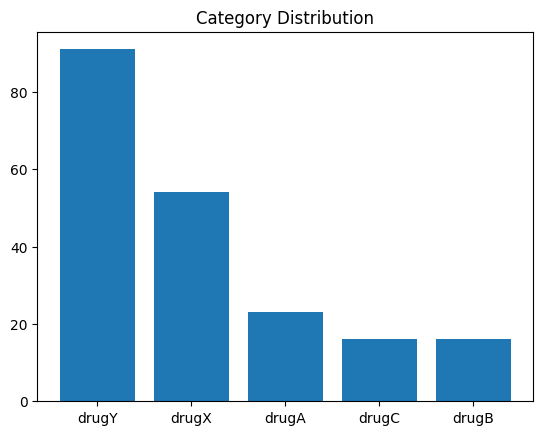

In [60]:
# the distribution with each drug recommendation
plt.bar(x=category_counts.index, height=category_counts.values)
plt.title('Category Distribution')
plt.show()

The distribution of the different classes, clearly indicating that Drug X and Drug Y have many more records in comparison to the other 3.

# Modeling & Evaluation

In [61]:
y = my_data['Drug']
X = my_data.drop(['Drug','Drug_num'], axis=1)

In [62]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=32)
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_trainset,y_trainset)
X_trainset.shape # 200 records

(140, 5)

In [63]:
tree_predictions = drugTree.predict(X_testset)

In [64]:
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_testset, tree_predictions))

Decision Trees's Accuracy:  0.9833333333333333


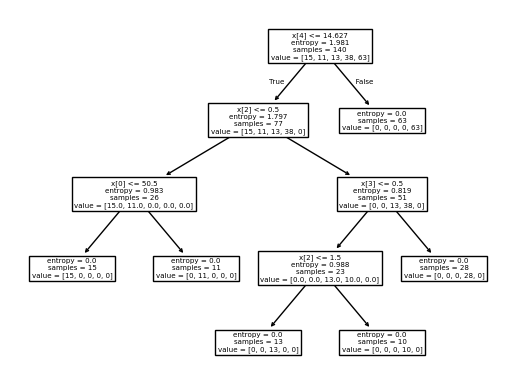

In [65]:
plot_tree(drugTree)
plt.show()

Drug A:0, B:1, C:2, X:3, Y:4 ---------- Sex: F -> 0, M -> 1 ----------- BP High: 0, Low: 1, Normal: 2 ------------ Choles High: 0, Normal: 1

Dựa vào x0,...x4, sample, value, entropy, true/false:

Drug Y (Na_to_K > 14.627) (x4)

Drug C (Na_to_K <= 14.627, BP = low, Cho <= high) (x2)

Drug X(Na_to_K <= 14.627, BP = nomal, Cho = high) (x3)

 Drug A (Na_to_K <= 14.627, BP = high, Age <= 50.5) (x0)

Drug B (Na_to_K <= 14.627, BP = high, Age > 50.5) (x1)

In [66]:
# If the max depth of the tree is reduced to 3, how would the performance of the model be affected?
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
drugTree.fit(X_trainset,y_trainset)
tree_predictions = drugTree.predict(X_testset)
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_testset, tree_predictions))

Decision Trees's Accuracy:  0.8166666666666667


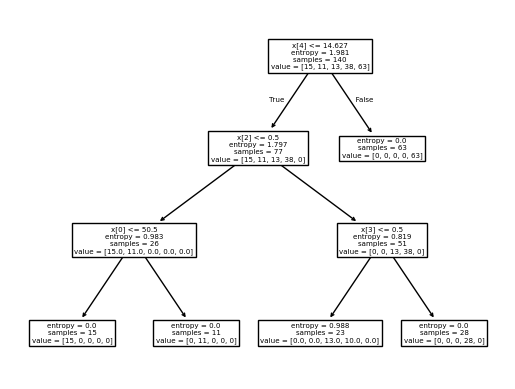

In [67]:
plot_tree(drugTree)
plt.show()